<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_9_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)



This dataset presents health insurance costs, with each row representing an individual and their associated attributes. Let's break down the columns:

*   **age:** The age of the individual (numeric).
*   **is_male:** A boolean indicating whether the individual is male (TRUE) or female (FALSE).
*   **bmi:** Body Mass Index, a measure of body fat based on height and weight (numeric).
*   **bloodpressure:** Systolic blood pressure (numeric).
*   **diabetic:** A boolean indicating whether the individual is diabetic (TRUE) or not (FALSE).
*   **children:** The number of children the individual has (numeric).
*   **smoker:** A boolean indicating whether the individual is a smoker (TRUE) or not (FALSE).
*   **claim:** The amount of the insurance claim or medical expenses (numeric). This is likely the target variable you'd want to predict.


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/demographics.csv')
df

,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim
0,39,True,23.2,91,True,0,False,1121.87
1,24,True,30.1,87,False,0,False,1131.51
2,19,True,41.1,100,False,0,False,1146.80
3,20,True,43.0,86,False,0,False,1149.40
4,30,True,53.1,97,False,0,False,1163.46
...,...,...,...,...,...,...,...,...
1327,44,False,35.5,88,True,0,True,55135.40
1328,59,False,38.1,120,False,1,True,58571.07
1329,30,True,34.5,91,True,3,True,60021.40
1330,37,True,30.4,106,False,0,True,62592.87



 PCA simplifies complex data by reducing its dimensions. It finds the most important features that capture the most variance in the data. Imagine describing a cloud - you could measure many things, but some are more important than others. PCA finds those key measurements. It looks for directions with the most spread (variance), called principal components. By keeping only the top few, you reduce complexity while preserving important information. This helps with visualization, noise removal, and improving performance of machine learning algorithms. It's used in image compression, facial recognition, and finance.

![](http://www.billconnelly.net/wp-content/uploads/2021/05/PCA1-smaller-smaller.gif)




Let's reduce the dimensionality of the 'bmi', 'bloodpressure', 'diabetic', and 'smoker' columns of the DataFrame df to a single principal component, storing the result in pca1.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
health = pca.fit_transform(df[['bmi', 'bloodpressure', 'diabetic', 'smoker']])
health

array([[-3.96922345],
       [-7.20971262],
       [ 6.88770503],
       ...,
       [-2.74972123],
       [11.72650493],
       [ 8.56825067]])

 Now let's reduce the dimensionality of the 'age', 'is_male', and 'children' columns of the DataFrame df to a single principal component, storing the result in pca2


In [ ]:

demog = pca.fit_transform(df[['age','is_male','children']])
demog


array([[  0.90786693],
       [-14.08971132],
       [-19.08890407],
       ...,
       [ -8.0993153 ],
       [ -1.09181017],
       [ -8.07294338]])

Let's then create a new dataframe with this 3 components only, claim, health, and demographics"""


In [ ]:

df_new = pd.DataFrame(df['claim'])
df_new['health'] = health
df_new['demog'] = demog
df_new

,claim,health,demog
0,1121.87,-3.969223,0.907867
1,1131.51,-7.209713,-14.089711
2,1146.80,6.887705,-19.088904
3,1149.40,-6.828382,-18.089066
4,1163.46,5.184686,-8.090680
...,...,...,...
1327,55135.40,-5.625667,5.924796
1328,58571.07,26.466236,20.919496
1329,60021.40,-2.749721,-8.099315
1330,62592.87,11.726505,-1.091810


Now we have to re-execute the KMean, and present again the scatter plots. Let's leverage painplot to speed up this.

Here we can see the relationships between 'claim', 'health', and 'demog' across three clusters. 'Claim' is right-skewed, while 'health' and 'demog' appear normally distributed. There's some correlation between 'claim' and both 'health' and 'demog'. While the clusters show some separation in the scatter plots, indicating partial distinction based on these variables, there's also overlap, suggesting other factors contribute to cluster formation. Further analysis is needed to fully understand the cluster characteristics.


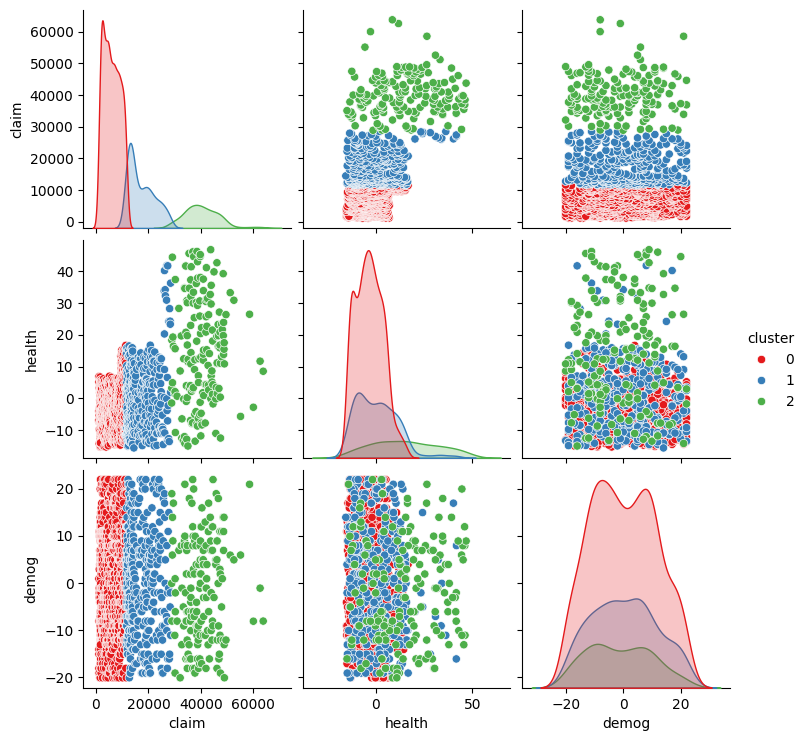

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_new)
df_new['cluster'] = kmeans.labels_
sns.pairplot(df_new, hue='cluster',palette='Set1')